# Одна куча

Одна куча S камней, ходы +1 и *2. Выигрыш 29+.
1. Ваня выигрывает первым ходом.
2. Петя выигрывает вторым ходом.
3. Ваня выигрывает первым или вторым ходом.

Логическая функция: можно ли закончить игру ровно за  M ходов (с двух сторон) или меньшее число ходов той же чётности (выигрывает тот же)?

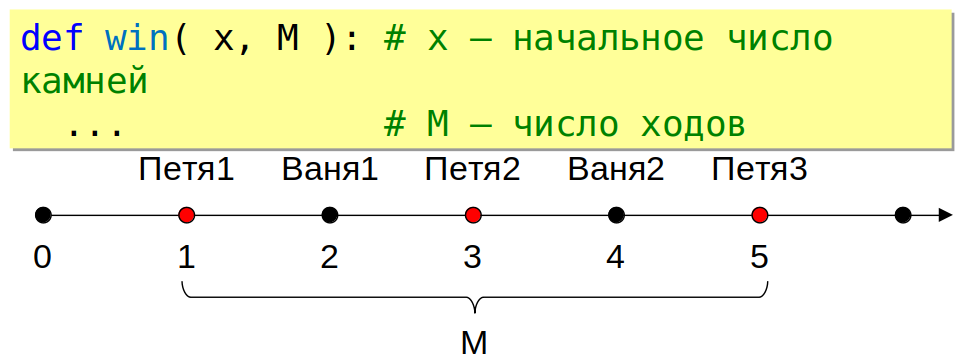

In [1]:
TARGET = 29
def gameOver( x ):
    return x >= TARGET

In [2]:
def win( x, M ): # M – осталось ходов
  if gameOver(x): 
    return M % 2 == 0
  if M == 0:
    return False
  nextWin = [ win( x+1, M-1 ),
              win( x*2, M-1 ) ]
  return any(nextWin) if (M-1)%2 == 0 else all(nextWin)

In [4]:
for S in range(1, TARGET):
  for M in range(1, 5):
    if win( S, M ):
      print( S, M )
      break  # находим наименьшее M для S

7 3
12 4
13 3
14 2
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1


In [13]:
ans1 = [ S for S in range(1, TARGET) 
           if win(S, 2) ]
print( "19:", ans1 )

ans2 = [ S for S in range(1, TARGET)
           if win(S, 3) and not win(S, 1)]
print( "20:", ans2 )

ans3 = [ S for S in range(1, TARGET)
           if win(S, 4) and not win(S, 2)]
print( "21:", ans3 )

19: [14]
20: [7, 13]
21: [12]


# Две кучи

Две кучи, 17 + S камней, ходы +1 и *2. Выигрыш 259+.
1. Ваня выигрывает первым ходом.
2. Петя выигрывает вторым ходом.
3. Ваня выигрывает первым или вторым ходом.

In [11]:
TARGET = 259
N1 = 17
def gameOver( x ): #кортеж (s1, s2)
  return sum(x) >= TARGET
def next( x ):
  return (x[0]+1, x[1]), (x[0]*2, x[1]), \
         (x[0], x[1]+1), (x[0], x[1]*2)

In [13]:
def win( x, M ):
  if gameOver(x): 
    return M % 2 == 0
  if M == 0: 
    return False
  # nextWin = [ win( y, M-1 ) 
  #             for y in next(x) ]
  nextWin = [ win( y, M-1 ) 
              for y in (
                (x[0]+1, x[1]), 
                (x[0]*2, x[1]), 
                (x[0], x[1]+1), 
                (x[0], x[1]*2)
              ) ]
  return any(nextWin) if (M-1)%2 == 0 else all(nextWin)

In [18]:
for S in range(1, TARGET-N1 ):
  for M in range(1,5):
    if win( (N1,S) , M ):
      if M == 4: print( S, M )
      break

111 4
119 4


In [14]:
ans1 = [ S for S in range(1, TARGET-N1)
         if win((N1, S), 2) ]
print( "19:", ans1 )
ans2 = [ S for S in range(1, TARGET)
     if win((N1,S), 3) and not win((N1,S), 1)]
print( "20:", ans2 )
ans3 = [ S for S in range(1, TARGET)
     if win((N1,S), 4) and not win((N1,S), 2)]
print( "21:", ans3 )

19: []
20: [112, 120]
21: [111, 119]


# Урок 20.04

№ 7621 Досрочная волна 2023 (Уровень: Базовый)
Два игрока, Петя и Ваня, играют в следующую игру. Перед игроками лежит куча камней. Игроки ходят по очереди, первый ход делает Петя. За один ход игрок может добавить в кучу один или четыре камня либо увеличить количество камней в куче в три раза. У каждого игрока есть неограниченное количество камней, чтобы делать ходы.

Игра завершается в тот момент, когда количество камней в куче становится не менее 43.

Победителем считается игрок, сделавший последний ход, т.е. первым получивший кучу из 43 камней или больше.

В начальный момент в куче было S камней; 1 ≤ S ≤ 42.

Будем говорить, что игрок имеет выигрышную стратегию, если он может выиграть при любых ходах противника.

Укажите минимальное значение S, при котором Петя не может выиграть за один ход, но при любом ходе Пети Ваня может выиграть своим первым ходом.

Задание 20.
Для игры, описанной в задании 19, найдите два наименьших значения S, при которых у Пети есть выигрышная стратегия, причём одновременно выполняются два условия:

− Петя не может выиграть за один ход;

− Петя может выиграть своим вторым ходом независимо от того, как будет ходить Ваня.

Найденные значения запишите в ответе в порядке возрастания. 


Задание 21.
Для игры, описанной в задании 19, найдите минимальное значение S, при котором одновременно выполняются два условия:

– у Вани есть выигрышная стратегия, позволяющая ему выиграть первым или вторым ходом при любой игре Пети;

– у Вани нет стратегии, которая позволит ему гарантированно выиграть первым ходом. 

In [10]:
TARGET = 43
def gameOver( x ):
    return x >= TARGET

def win( x, M ): # M – осталось ходов
  if gameOver(x): 
    return M % 2 == 0
  if M == 0:
    return False
  nextWin = [ win( x+1, M-1 ),
              win( x+4, M-1 ),
              win( x*3, M-1 ) ]
  return any(nextWin) if (M-1)%2 == 0 else all(nextWin)

print('19:', [S for S in range(1, TARGET) if win(S, 2)]
      )

print('20:', [S for S in range(1, TARGET) if win(S, 3) and not win(S, 1)]
       )

print('21:', min([S for S in range(1, TARGET) if win(S, 4) and not win(S, 2)])
      )


19: [14]
20: [10, 13]
21: 9


	
№ 7269 OpenFIPI (Уровень: Базовый)
Два игрока, Петя и Ваня, играют в следующую игру. Перед игроками лежат две кучи камней. Игроки ходят по очереди, первый ход делает Петя. За один ход игрок может добавить в одну из куч (по своему выбору) один камень или увеличить количество камней в куче в два раза. Для того чтобы делать ходы, у каждого игрока есть неограниченное количество камней.Игра завершается в тот момент, когда суммарное количество камней в кучах становится не менее 255. Победителем считается игрок, сделавший последний ход, т.е. первым получивший такую позицию, при которой в кучах будет 255 или больше камней.

В начальный момент в первой куче было 17 камней, во второй куче – S камней; 1 ≤ S ≤ 237.

Будем говорить, что игрок имеет выигрышную стратегию, если он может выиграть при любых ходах противника.

Известно, что Ваня выиграл своим первым ходом после неудачного первого хода Пети. Укажите минимальное значение S, когда такая ситуация возможна.

Задание 20.
Для игры, описанной в предыдущем задании, найдите два наименьших значения S, при которых у Пети есть выигрышная стратегия, причём одновременно выполняются два условия:

− Петя не может выиграть за один ход;

− Петя может выиграть своим вторым ходом независимо от того, как будет ходить Ваня.

Найденные значения запишите в ответе в порядке возрастания.




Задание 21.
Для игры, описанной в задании 19, найдите минимальное значение S, при котором одновременно выполняются два условия:

– у Вани есть выигрышная стратегия, позволяющая ему выиграть первым или вторым ходом при любой игре Пети;

– у Вани нет стратегии, которая позволит ему гарантированно выиграть первым ходом.

In [23]:
TARGET = 255
N1 = 17

def gameOver( x ): #кортеж (s1, s2)
  return sum(x) >= TARGET

def win( x, M ):
  if gameOver(x): 
    return M % 2 == 0
  if M == 0: 
    return False
  nextWin = [ win( y, M-1 ) 
              for y in (
                (x[0]+1, x[1]), 
                (x[0]*2, x[1]), 
                (x[0], x[1]+1), 
                (x[0], x[1]*2)
              ) ]
  return any(nextWin) if (M-1)%2 == 0 else all(nextWin)

ans1 = [ S for S in range(1, TARGET-N1)
         if win((N1, S), 2) ]
print( "19:", ans1 )

ans2 = [ S for S in range(1, TARGET)
     if win((N1,S), 3) and not win((N1,S), 1)]
print( "20:", ans2 )

ans3 = [ S for S in range(1, TARGET)
     if win((N1,S), 4) and not win((N1,S), 2)]
print( "21:", ans3 )

19: []
20: [110, 118]
21: [109, 117]


Два игрока, Петя и Ваня, играют в следующую игру. Перед игроками лежат две кучи камней. Игроки ходят по очереди, первый ход делает Петя. За один ход игрок может добавить в меньшую кучу любое количество камней от одного до количества камней в этой куче. Изменять количество камней в большей куче не разрешается. Если кучи содержат равное количество камней, добавлять камни можно в любую из них.

Игра завершается, когда общее количество камней в кучах становится более 39 Победителем считается игрок, сделавший последний ход, то есть первым получивший 40 или больше камней в двух кучах.

Известно, что Петя смог выиграть первым ходом. Какое наименьшее число камней могло быть суммарно в двух кучах?

Задание 20.
В игре, описанной в задании 19, в начальный момент в первой куче было 4 камня, а во второй – S камней, 1 ≤ S ≤ 35

Укажите минимальное и максимальное из таких значений S, при которых Петя не может выиграть первым ходом, но у Пети есть выигрышная стратегия, позволяющая ему выиграть вторым ходом при любой игре Вани.

В ответе запишите сначала минимальное значение, затем максимальное.


Задание 21.
В игре, описанной в задании 19, в начальный момент в первой куче было 4 камня, а во второй – S камней, 1 ≤ S ≤ 35

Найдите минимальное из таких значений S, при котором у Вани есть стратегия, позволяющая ему выиграть вторым ходом при любой игре Пети, но у Вани нет стратегии, которая позволяла бы ему гарантированно выиграть первым ходом.

In [36]:
TARGET = 40
# N1 = 17

def gameOver( x ): #кортеж (s1, s2)
  return sum(x) >= TARGET

def win( x, M ):
  if gameOver(x): 
    return M % 2 == 0
  if M == 0: 
    return False
  s1, s2 = min(x), max(x)
  nextWin = [ win( (s1 + y, s2), M-1 ) for y in range(1, s1 + 1) ]
  return any(nextWin) if (M-1)%2 == 0 else all(nextWin)

ans1 = []
for N1 in range(1, TARGET - 1):
  ans1 += [ S + N1 for S in range(1, TARGET-N1)
          if win((N1, S), 2) ]
print( "19:", min(ans1) )

# ans2 = [ S for S in range(1, TARGET)
#      if win((N1,S), 3) and not win((N1,S), 1)]
# print( "20:", ans2 )

# ans3 = [ S for S in range(1, TARGET)
#      if win((N1,S), 4) and not win((N1,S), 2)]
# print( "21:", ans3 )

19: 26


In [42]:
TARGET = 31
def gameOver( x ):
    return x >= TARGET

def win( x, M ): # M – осталось ходов
  if gameOver(x): 
    return M % 2 == 0
  if M == 0:
    return False
  nextWin = [ win( x+1, M-1 ),
              win( x+5, M-1 ),
              win( x*2, M-1 ) ]
  return any(nextWin) if (M-1)%2 == 0 else all(nextWin)

print('19:', [S for S in range(1, TARGET) if win(S, 3)]
      )

print('20:', [S for S in range(1, TARGET) if win(S, 101) and not win(S, 1)]
       )

print('21:', min([S for S in range(1, TARGET) if win(S, 4) and not win(S, 2)])
      )


19: [10, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
20: [2, 4, 6, 8, 10, 12, 14]
21: 9
